<a href="https://colab.research.google.com/github/pedroescobedob/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Pedro_Escobedo_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
from matplotlib import style

In [0]:
from google.colab import files
uploaded = files.upload()

Saving house-votes-84.data to house-votes-84 (1).data


In [0]:
columns = ['Democrat or Republican',
           'Handicapped infants', 'Water project','Adoption of the budget resolution',
           'Physician fee','El Salvador Aid','Religious groups in schools',
           'Anti satellite test ban', 'Aid to Nicaraguan contras','Mx missile',
           'Immigration','Synfuels corporation cutback','Education spending',
           'Superfund right to sue','Crime','Duty free exports',
           'Export Administration Act South Africa']

In [0]:
house_votes = pd.read_csv('house-votes-84.data', names=columns)

In [0]:
house_votes.shape

(435, 17)

In [0]:
house_votes.head(10)

,Democrat or Republican,Handicapped infants,Water project,Adoption of the budget resolution,Physician fee,El Salvador Aid,Religious groups in schools,Anti satellite test ban,Aid to Nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export Administration Act South Africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [0]:
# defining what a missing values is

missing_values = ['?']

In [0]:
# Replacing the missing values with N/A values

df = pd.read_csv('house-votes-84.data', names=columns, na_values=missing_values)

In [0]:
df.head()

,Democrat or Republican,Handicapped infants,Water project,Adoption of the budget resolution,Physician fee,El Salvador Aid,Religious groups in schools,Anti satellite test ban,Aid to Nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export Administration Act South Africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df.shape

(435, 17)

In [0]:
# Total number of N/A values

print(df.isnull().sum().sum())

392


In [0]:
# Converting strings into integers
y_or_n = {'y': 1,'n': 2}

In [0]:
new_df = df.replace(y_or_n)
new_df.head()

,Democrat or Republican,Handicapped infants,Water project,Adoption of the budget resolution,Physician fee,El Salvador Aid,Religious groups in schools,Anti satellite test ban,Aid to Nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export Administration Act South Africa
0,republican,2,1,2,1,1,1,2,2,2,1,nan,1,1,1,2,1
1,republican,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,nan
2,democrat,nan,1,1,nan,1,1,2,2,2,2,1,2,1,1,2,2
3,democrat,2,1,1,2,nan,1,2,2,2,2,1,2,1,2,2,1
4,democrat,1,1,1,2,1,1,2,2,2,2,1,nan,1,1,1,1


In [0]:
new_df = pd.options.display.float_format = '{:,.0f}'.format

In [0]:
democrat = new_df[new_df['Democrat or Republican'] == 'democrat']

In [0]:
democrat.shape

(267, 17)

In [0]:
republican = new_df[new_df['Democrat or Republican'] == 'republican']

In [0]:
republican.shape

(168, 17)

In [0]:
democrat_1 = democrat.median()
democrat_1

Handicapped infants                      1
Water project                            1
Adoption of the budget resolution        1
Physician fee                            2
El Salvador Aid                          2
Religious groups in schools              2
Anti satellite test ban                  1
Aid to Nicaraguan contras                1
Mx missile                               1
Immigration                              2
Synfuels corporation cutback             1
Education spending                       2
Superfund right to sue                   2
Crime                                    2
Duty free exports                        1
Export Administration Act South Africa   1
dtype: float64

In [0]:
democrat.fillna(democrat_1, inplace=True)
democrat

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Democrat or Republican,Handicapped infants,Water project,Adoption of the budget resolution,Physician fee,El Salvador Aid,Religious groups in schools,Anti satellite test ban,Aid to Nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export Administration Act South Africa
2,democrat,1,1,1,2,1,1,2,2,2,2,1,2,1,1,2,2
3,democrat,2,1,1,2,2,1,2,2,2,2,1,2,1,2,2,1
4,democrat,1,1,1,2,1,1,2,2,2,2,1,2,1,1,1,1
5,democrat,2,1,1,2,1,1,2,2,2,2,2,2,1,1,1,1
6,democrat,2,1,2,1,1,1,2,2,2,2,2,2,2,1,1,1
9,democrat,1,1,1,2,2,2,1,1,1,2,2,2,2,2,1,1
12,democrat,2,1,1,2,2,2,1,1,1,2,2,2,1,2,1,1
13,democrat,1,1,1,2,2,1,1,1,1,1,1,2,2,2,1,1
16,democrat,1,2,1,2,2,1,2,1,1,1,1,1,2,2,2,1
17,democrat,1,1,1,2,2,2,1,1,1,2,2,2,1,2,1,1


In [0]:
republican_1 = republican.median()
republican_1

Handicapped infants                      2
Water project                            1
Adoption of the budget resolution        2
Physician fee                            1
El Salvador Aid                          1
Religious groups in schools              1
Anti satellite test ban                  2
Aid to Nicaraguan contras                2
Mx missile                               2
Immigration                              1
Synfuels corporation cutback             2
Education spending                       1
Superfund right to sue                   1
Crime                                    1
Duty free exports                        2
Export Administration Act South Africa   1
dtype: float64

In [0]:
republican.fillna(republican_1, inplace=True)
republican

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Democrat or Republican,Handicapped infants,Water project,Adoption of the budget resolution,Physician fee,El Salvador Aid,Religious groups in schools,Anti satellite test ban,Aid to Nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export Administration Act South Africa
0,republican,2,1,2,1,1,1,2,2,2,1,2,1,1,1,2,1
1,republican,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,1
7,republican,2,1,2,1,1,1,2,2,2,2,2,2,1,1,2,1
8,republican,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,1
10,republican,2,1,2,1,1,2,2,2,2,2,2,1,1,1,2,2
11,republican,2,1,2,1,1,1,2,2,2,2,1,1,1,1,2,1
14,republican,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,1
15,republican,2,1,2,1,1,1,2,2,2,1,2,1,1,1,2,1
18,republican,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,2
28,republican,1,2,2,1,1,2,1,1,1,2,2,1,1,1,2,1


In [0]:
new_df.update(democrat)

In [0]:
new_df

,Democrat or Republican,Handicapped infants,Water project,Adoption of the budget resolution,Physician fee,El Salvador Aid,Religious groups in schools,Anti satellite test ban,Aid to Nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export Administration Act South Africa
0,republican,2,1,2,1,1,1,2,2,2,1,nan,1,1,1,2,1
1,republican,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,nan
2,democrat,1,1,1,2,1,1,2,2,2,2,1,2,1,1,2,2
3,democrat,2,1,1,2,2,1,2,2,2,2,1,2,1,2,2,1
4,democrat,1,1,1,2,1,1,2,2,2,2,1,2,1,1,1,1
5,democrat,2,1,1,2,1,1,2,2,2,2,2,2,1,1,1,1
6,democrat,2,1,2,1,1,1,2,2,2,2,2,2,2,1,1,1
7,republican,2,1,2,1,1,1,2,2,2,2,2,2,1,1,nan,1
8,republican,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,1
9,democrat,1,1,1,2,2,2,1,1,1,2,2,2,2,2,1,1


In [0]:
new_df.update(republican)

In [0]:
new_df

,Democrat or Republican,Handicapped infants,Water project,Adoption of the budget resolution,Physician fee,El Salvador Aid,Religious groups in schools,Anti satellite test ban,Aid to Nicaraguan contras,Mx missile,Immigration,Synfuels corporation cutback,Education spending,Superfund right to sue,Crime,Duty free exports,Export Administration Act South Africa
0,republican,2,1,2,1,1,1,2,2,2,1,2,1,1,1,2,1
1,republican,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,1
2,democrat,1,1,1,2,1,1,2,2,2,2,1,2,1,1,2,2
3,democrat,2,1,1,2,2,1,2,2,2,2,1,2,1,2,2,1
4,democrat,1,1,1,2,1,1,2,2,2,2,1,2,1,1,1,1
5,democrat,2,1,1,2,1,1,2,2,2,2,2,2,1,1,1,1
6,democrat,2,1,2,1,1,1,2,2,2,2,2,2,2,1,1,1
7,republican,2,1,2,1,1,1,2,2,2,2,2,2,1,1,2,1
8,republican,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,1
9,democrat,1,1,1,2,2,2,1,1,1,2,2,2,2,2,1,1


# **Confidence Interval**

In [0]:
def mean_confidence_interval(new_df, confidence=0.95):
    a = 1.0 * np.array(new_df)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [0]:
from scipy import stats 

def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean, mean - interval, mean + interval)

In [0]:
d_handicap = democrat['Handicapped infants']

In [0]:
sample_size = 100
sample = d_handicap.sample(sample_size)
sample.head()

203   1
396   1
64    1
45    1
94    1
Name: Handicapped infants, dtype: float64

In [0]:
sample_mean = sample.mean()
sample_std = np.std(sample, ddof=1)
print(sample_mean, sample_std)

1.36 0.48241815132442173


In [0]:
standard_error = sample_std/np.sqrt(sample_size)
standard_error

0.048241815132442176

In [0]:
t = 1.984 # 95% confidence
(sample_mean, sample_mean - t*standard_error, sample_mean + t*standard_error)

(1.36, 1.2642882387772347, 1.4557117612227655)

In [0]:
d_handicap_confidence = confidence_interval(sample, confidence=0.95)
d_handicap_confidence

(1.36, 1.2642777726426602, 1.45572222735734)

# **Confidence interval (Graph)**

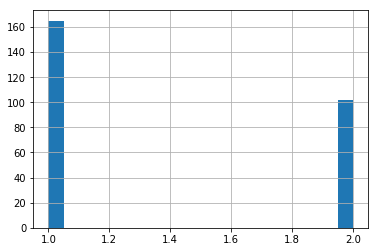

In [0]:
democrat['Handicapped infants'].hist(bins=20);

<ErrorbarContainer object of 3 artists>

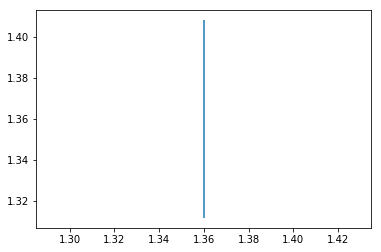

In [0]:
plt.errorbar(x = sample_mean, y = sample_mean, yerr = standard_error)

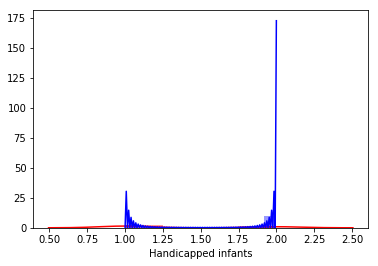

In [0]:
sns.distplot(democrat['Handicapped infants'], color='r')
sns.distplot(republican['Handicapped infants'], color='b');

# Interpret the confidence interval

The confidence interval shows that there is a 95% of confidence that democrats will not support Handicapped infants.

# Another Dataset

In [0]:
import pandas as pd
import numpy as np

In [6]:
exercise_df = pd.read_csv('https://raw.githubusercontent.com/pedroescobedob/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
exercise_df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [7]:
pip install pandas==0.23.4

In [34]:
pd.crosstab(exercise_df['weight'], exercise_df['exercise_time'])
time_e = pd.cut(exercise_df['exercise_time'], 5, labels=[-0.3, 60.0, 120.0, 180.0, 300.0])
weight_e = pd.cut(exercise_df['weight'], 5)
observed = pd.crosstab(weight_e, time_e, margins=True)
observed

exercise_time,-0.3,60.0,120.0,180.0,300.0,All
weight,,,,,,
"(99.854, 129.2]",53,65,71,79,107,375
"(129.2, 158.4]",44,76,67,74,74,179
"(158.4, 187.6]",61,93,56,38,10,335
"(187.6, 216.8]",76,73,29,1,0,258
"(216.8, 246.0]",44,9,0,0,0,53
All,316,192,223,278,191,1200


In [40]:
row_sums = observed.iloc[0:6, 5].values
col_sums = observed.iloc[5, 0:6].values

print(row_sums)
print(col_sums)

[ 375  179  335  258   53 1200]
[ 316  192  223  278  191 1200]


In [0]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)

In [42]:
chi_square = ((observed - expected)**2/(observed)).sum()
chi_square

exercise_time
-0.3     1.068731e+09
60.0     4.604584e+08
120.0             inf
180.0             inf
300.0             inf
All      3.450242e+09
dtype: float64

# Scipy

In [43]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

435.93903437927173 1.3055479820947514e-76 25 [[  92.8125       79.375        69.6875       73.4375       59.6875
   375.        ]
 [  63.6075       54.39833333   47.75916667   50.32916667   40.90583333
   257.        ]
 [  73.38375      62.75916667   55.09958333   58.06458333   47.19291667
   296.5       ]
 [  54.07875      46.24916667   40.60458333   42.78958333   34.77791667
   218.5       ]
 [  13.1175       11.21833333    9.84916667   10.37916667    8.43583333
    53.        ]
 [ 297.          254.          223.          235.          191.
  1200.        ]]
